In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder




In [3]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')   # Load the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.drop('customerID', axis=1, inplace=True)  # Drop the customerID column

There are 5174 nos and 1869 yeses in the Churn column


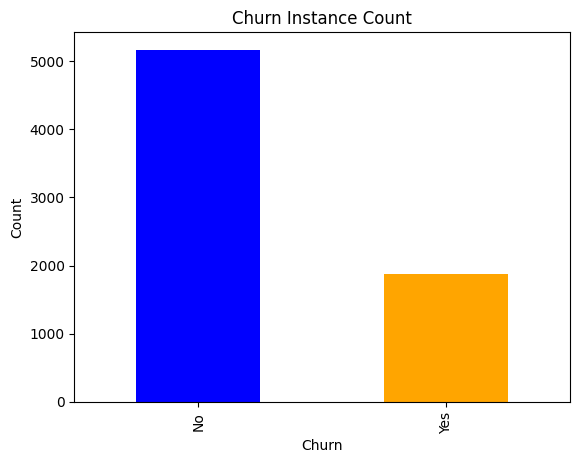

In [8]:
churn_instance_counts = df['Churn'].value_counts()
print(f"There are {churn_instance_counts.iloc[0]} nos and {churn_instance_counts.iloc[1]} yeses in the Churn column") #Indicates that the data is imbalances

churn_instance_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Instance Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [9]:
df.isnull().sum() #No missing values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df["TotalCharges"] = df["TotalCharges"].apply(lambda x: x.strip() if type(x) is str else x)  #Remove whitespaces
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
def print_rows_with_nan(df):
    nan_rows = df[df["TotalCharges"].isna()]
    print(nan_rows)

print_rows_with_nan(df) # Rows with missing values  

df.dropna(inplace=True) # Drop rows with missing values


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [11]:
# Identify columns with up to 4 unique values
columns_to_encode = [col for col in df.columns if df[col].nunique() <= 4]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [12]:
le = LabelEncoder()

# Identify columns with text data
text_columns = df_encoded.select_dtypes(include=['bool']).columns
new_df = df_encoded[[column for column in df_encoded.columns if column not in text_columns]]
# Apply label encoding to text columns
for column in text_columns:
    new_df[column] = le.fit_transform(df_encoded[column])

# Display the first few rows of the encoded dataframe
new_df.head()

/tmp/ipykernel_3727/2950500677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = le.fit_transform(df_encoded[column])
/tmp/ipykernel_3727/2950500677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = le.fit_transform(df_encoded[column])
/tmp/ipykernel_3727/2950500677.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


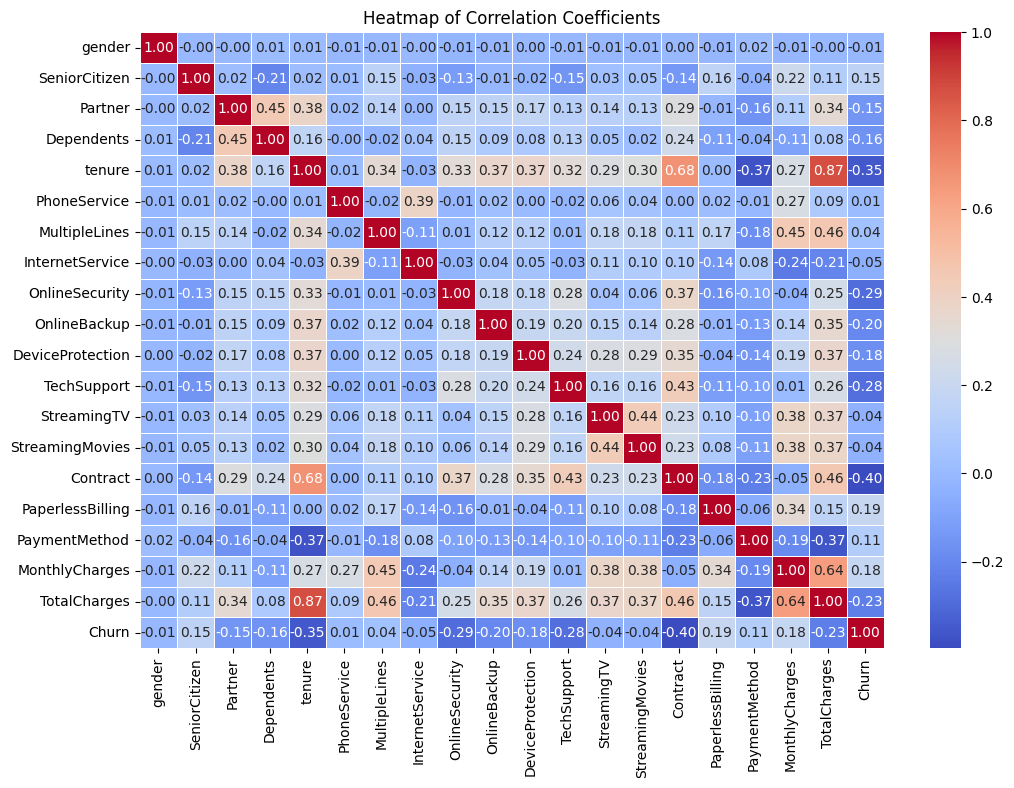

In [16]:
# Calculate the correlation matrix
label_encoded_df = pd.DataFrame()

for column in df.columns:
    label_encoded_df[column] = le.fit_transform(df[column])

corr_matrix = label_encoded_df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Coefficients')

plt.show()

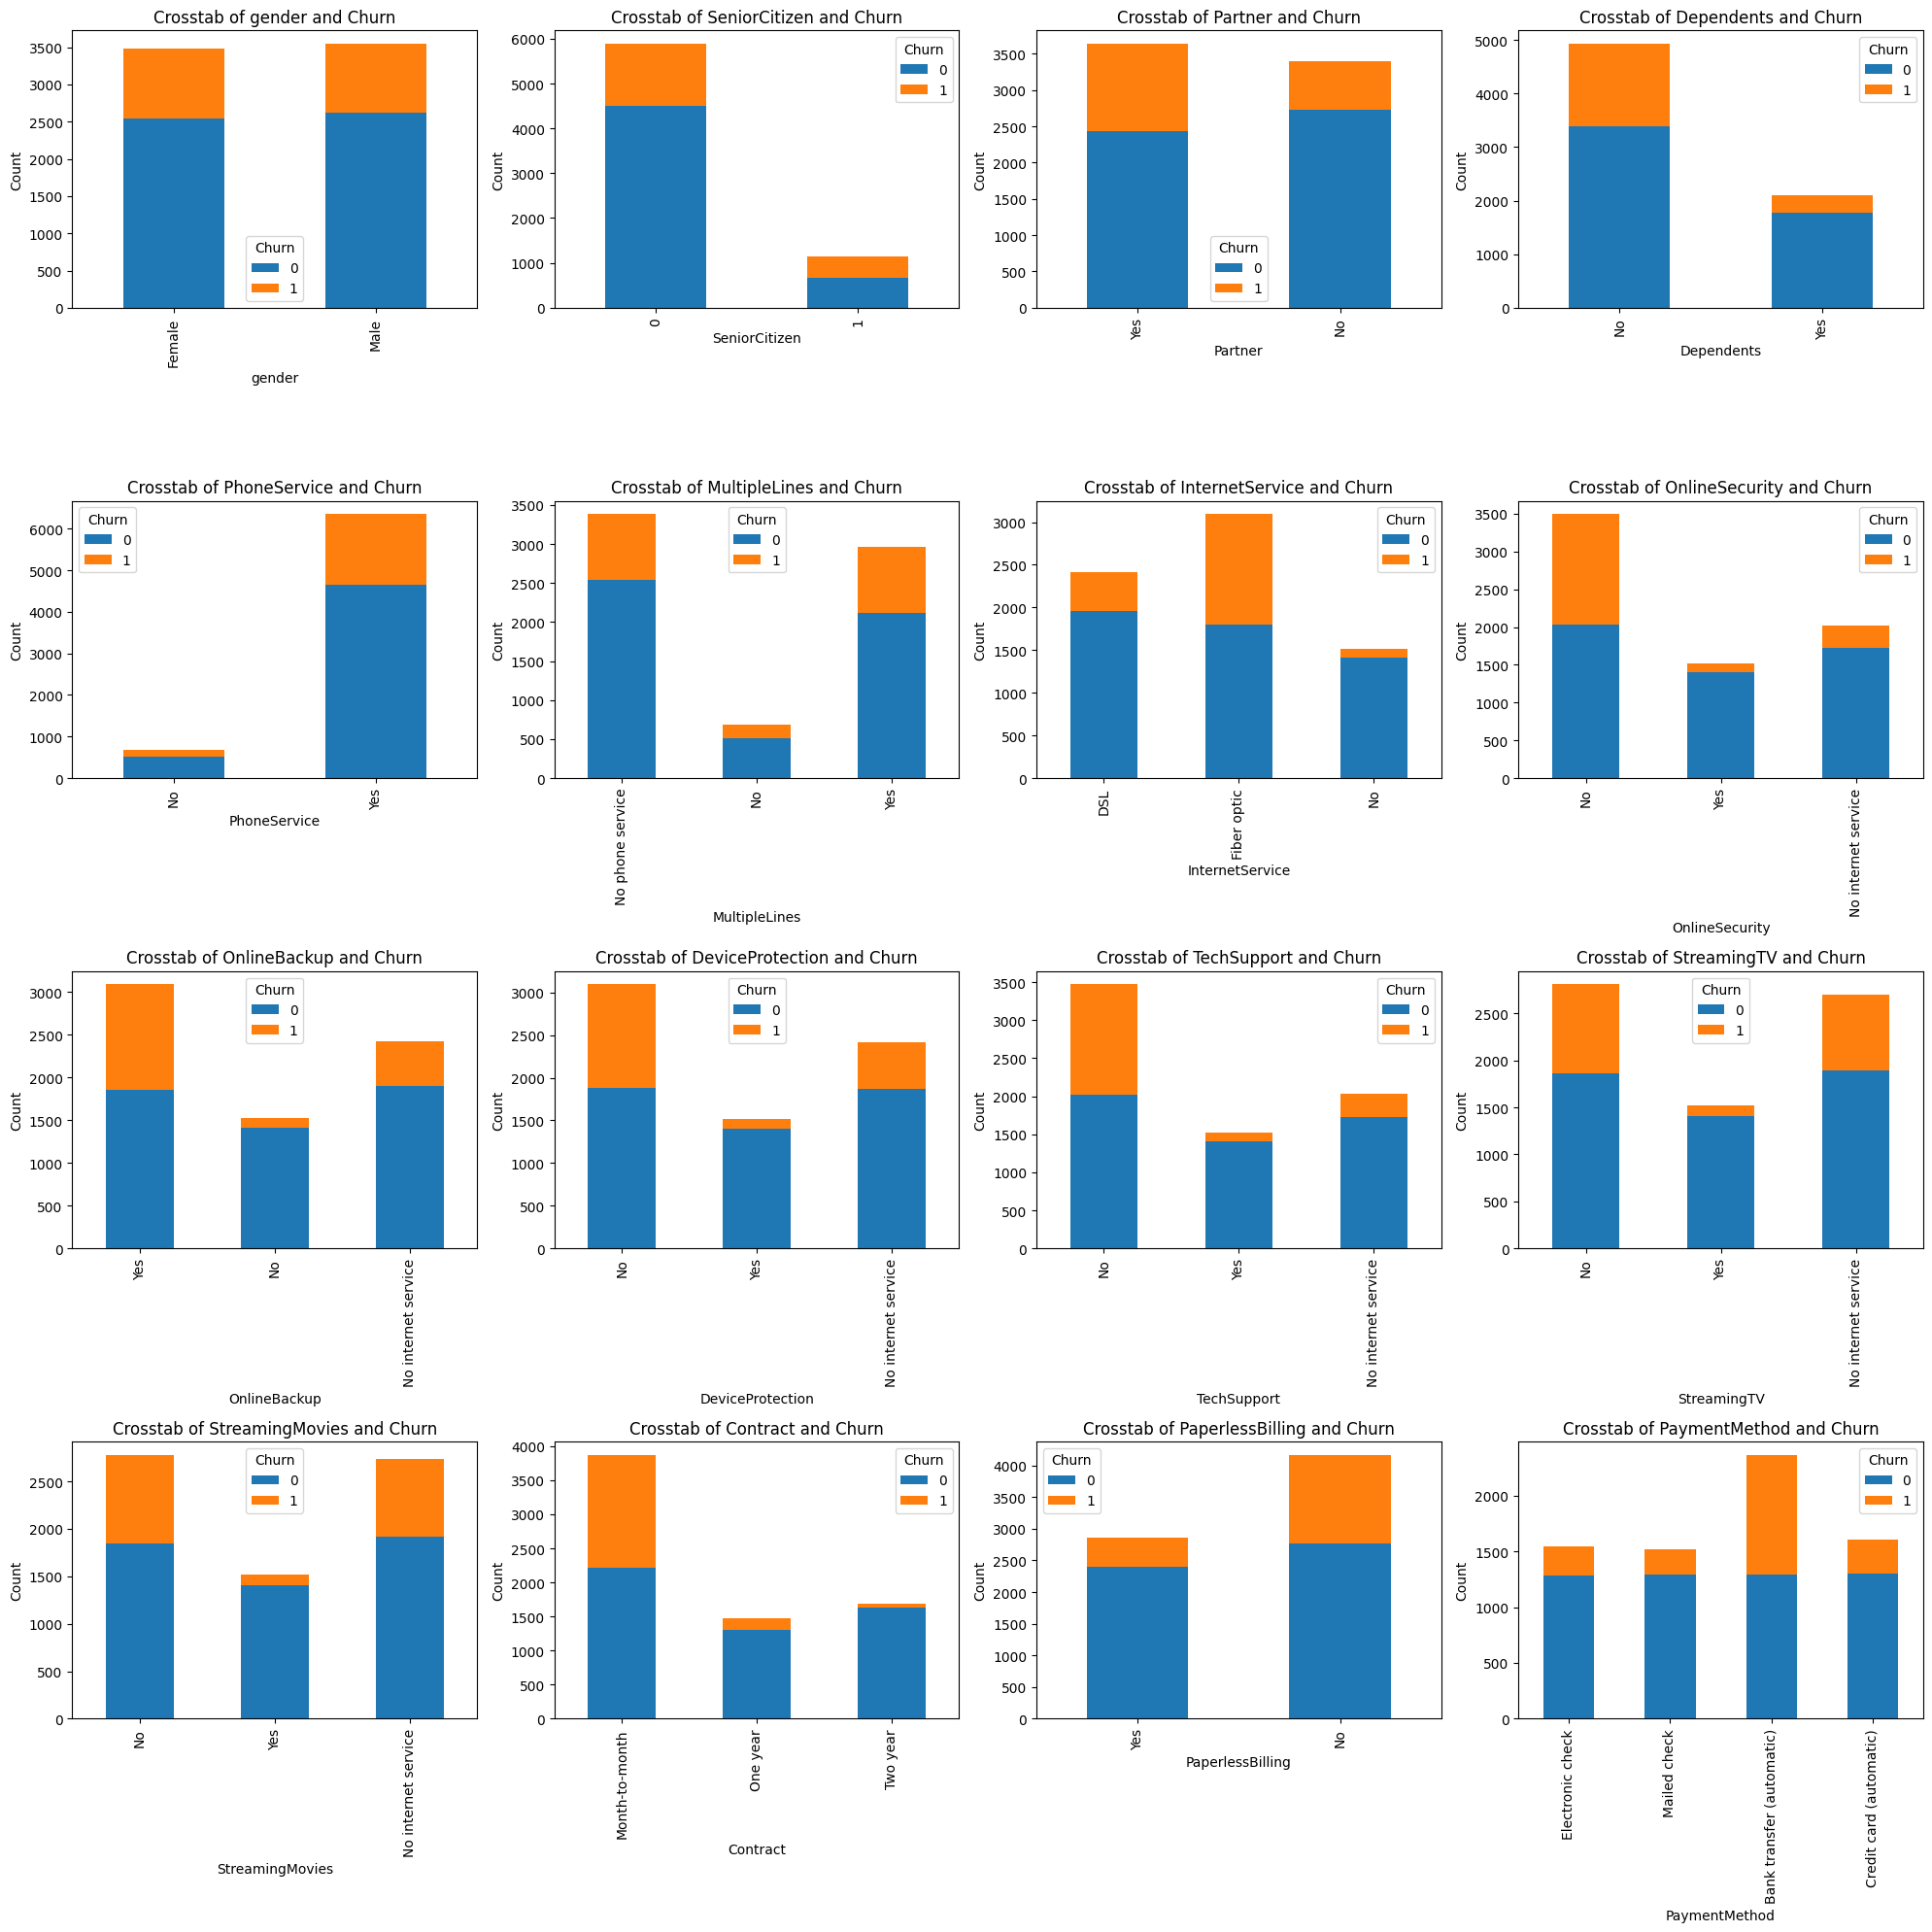

In [22]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    crosstab = pd.crosstab(label_encoded_df[column], label_encoded_df['Churn'])
    crosstab.index = df[column].unique()  # Replace the index with original labels
    crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Crosstab of {column} and Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

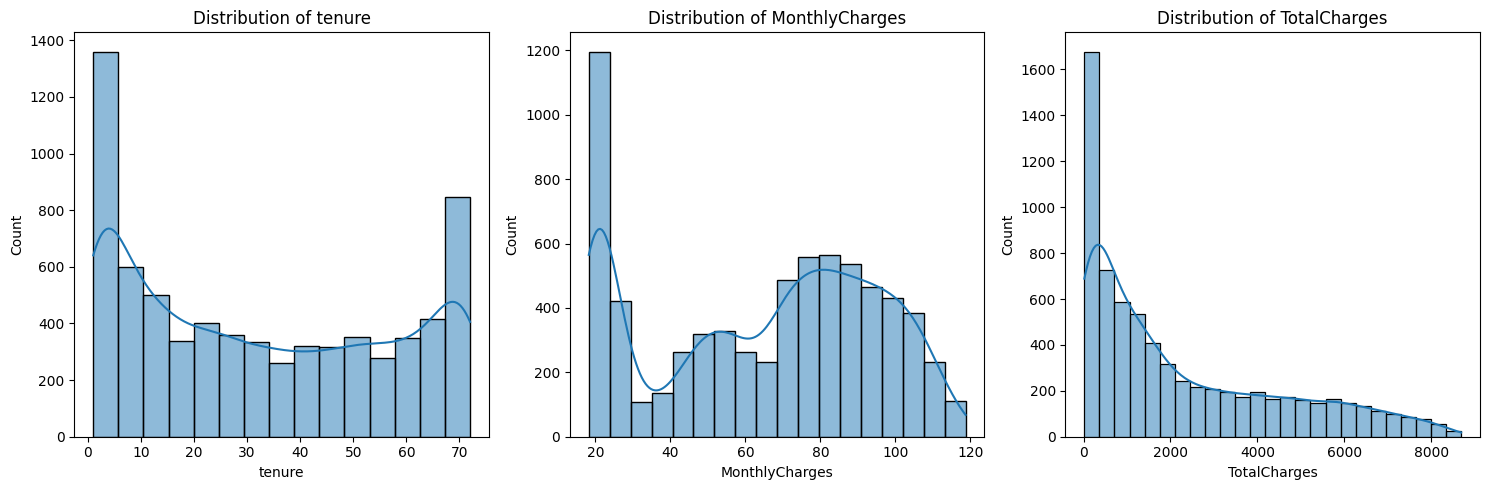

In [27]:
# Identify columns with more than 4 unique values
columns_to_plot = [col for col in label_encoded_df.columns if label_encoded_df[col].nunique() > 4]

num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Column tenure has 0 outliers
Column MonthlyCharges has 0 outliers
Column TotalCharges has 0 outliers
No outliers detected in the dataset based on the Z-score method.


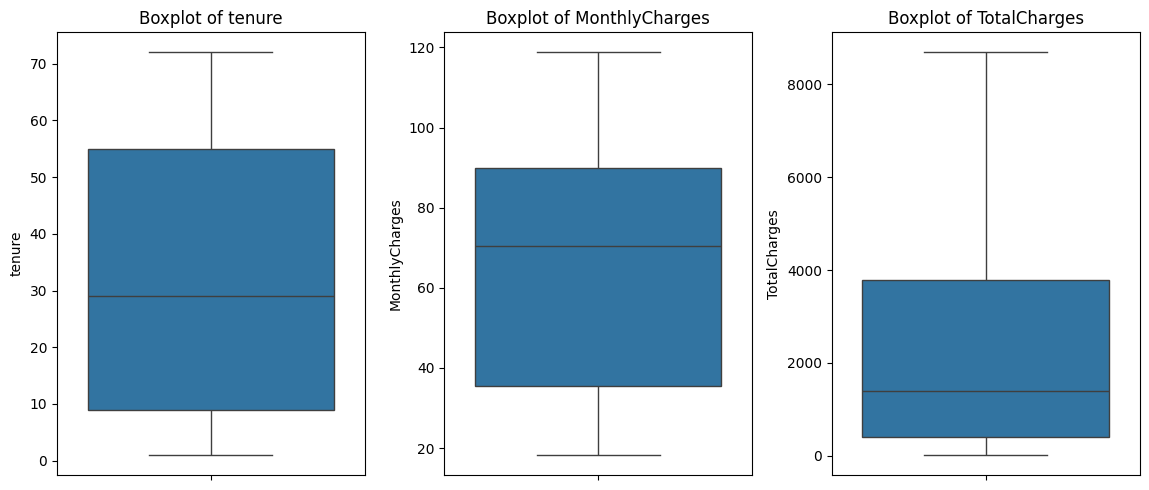

In [ ]:
from scipy.stats import zscore
# Identify columns with outliers

numeric_cols = [column for column in df.select_dtypes(include=['float64', 'int64']).columns if column not in ['SeniorCitizen', 'Churn']]

# Outliers based on IQR
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

# Print columns with outliers
for col, count in outliers.items():
 
    print(f'Column {col} has {count} outliers')
    

plt.figure(figsize=(15, 5))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    if col == 'SeniorCitizen':
        continue
    plt.subplot(1, len(df.select_dtypes(include=['float64', 'int64']).columns), i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

# Calculate Z-scores
z_scores = label_encoded_df[numeric_cols].apply(zscore)

# Identify rows with any Z-scores greater than 3 (or less than -3)
outliers = (z_scores.abs() > 3).any(axis=1)

# Check if there are outliers
if outliers.any():
    print(f"Outliers detected in the dataset! Total number of outlier rows: {outliers.sum()}")
    print("\nHere are the rows identified as outliers:")
    print(label_encoded_df[outliers])  # Display rows with outliers
else:
    print("No outliers detected in the dataset based on the Z-score method.")

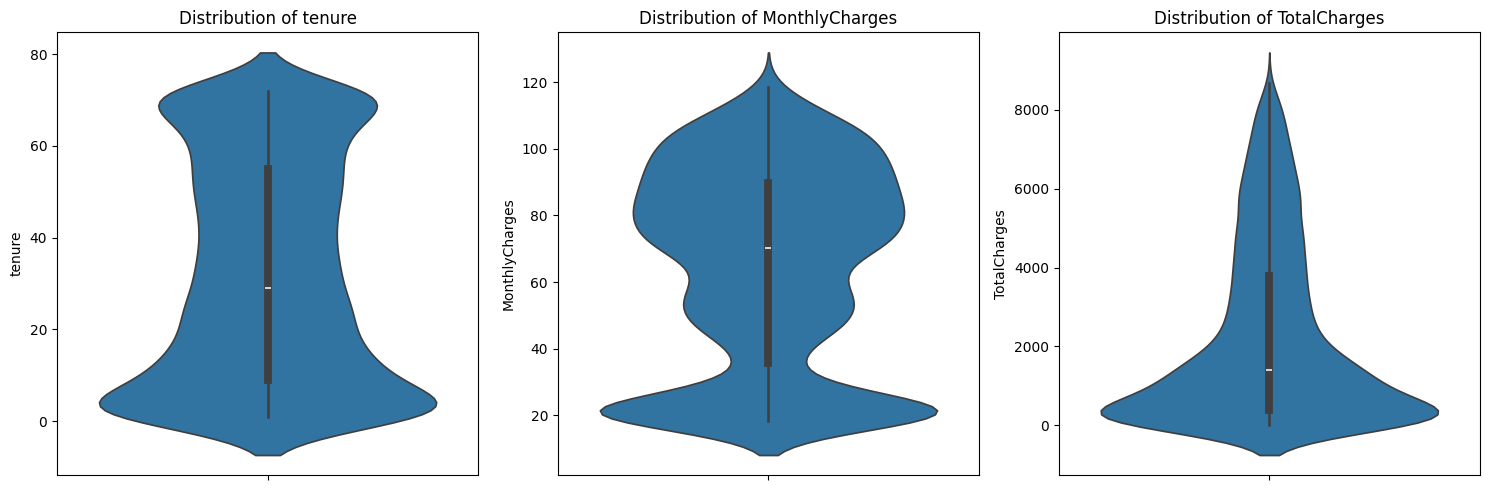

In [ ]:

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.violinplot(y=df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

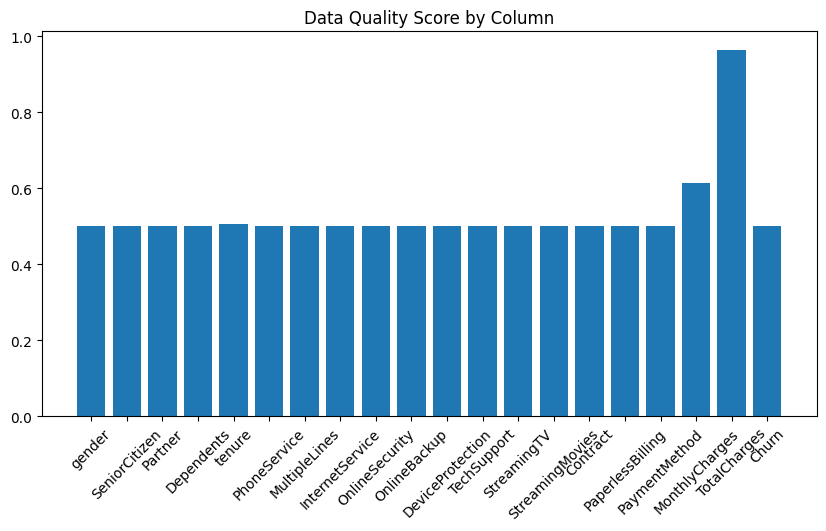

In [36]:
def calculate_quality_score(series):
        non_null = series.count() / len(series)
        unique_ratio = len(series.unique()) / len(series)
        return (non_null + unique_ratio) / 2
    
quality_scores = {col: calculate_quality_score(df[col]) for col in df.columns}
plt.figure(figsize=(10, 5))
plt.bar(quality_scores.keys(), quality_scores.values())
plt.xticks(rotation=45)
plt.title('Data Quality Score by Column')
plt.show()

In [37]:
from scipy import stats

for col in numeric_cols:
    stat, p_value = stats.normaltest(df[col].dropna())
    print(f"\nNormality Test for {col}:")
    print(f"p-value: {p_value:.4f}")
    print("Normal distribution" if p_value > 0.05 else "Not normal distribution")


Normality Test for tenure:
p-value: 0.0000
Not normal distribution

Normality Test for MonthlyCharges:
p-value: 0.0000
Not normal distribution

Normality Test for TotalCharges:
p-value: 0.0000
Not normal distribution


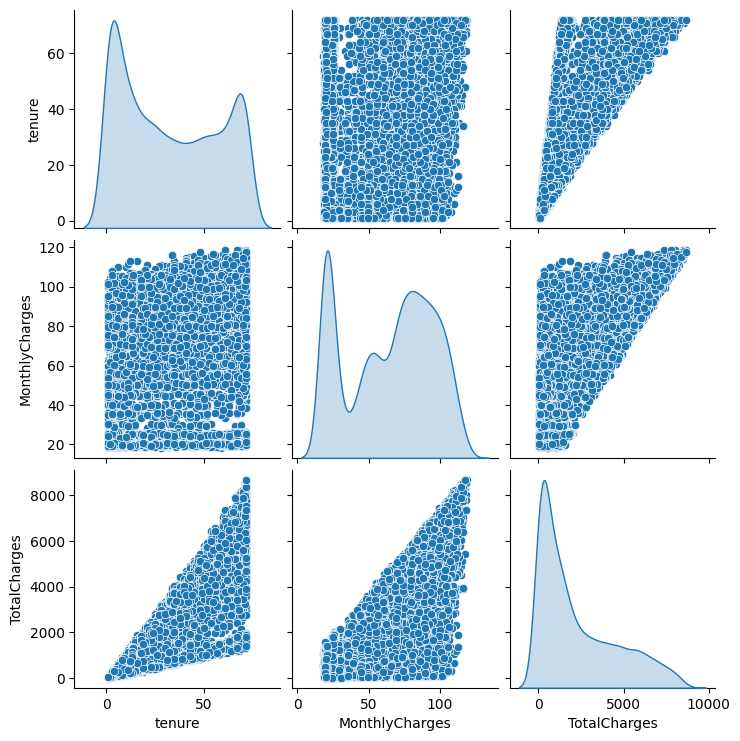

In [38]:
if len(numeric_cols) >= 2:
    sns.pairplot(df[numeric_cols], diag_kind='kde')
    plt.show()

In [45]:
from scipy.stats import chi2_contingency

# List to store p-values
p_values_chi2 = {}

# Perform chi-square test for each categorical column
for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    p_values_chi2[column] = (p, chi2)

# Sort columns by p-value
sorted_p_values = sorted(p_values_chi2.items(), key=lambda item: item[1][0])

# Display the columns that best predict churn
print("Columns that best predict churn based on chi-square test:")
# Store the results in a DataFrame
chi2_results_df = pd.DataFrame(sorted_p_values, columns=['Column', 'Values'])
chi2_results_df[['p-value', 'chi2']] = pd.DataFrame(chi2_results_df['Values'].tolist(), index=chi2_results_df.index)
chi2_results_df.drop(columns=['Values'], inplace=True)

# Display the DataFrame
chi2_results_df.head(len(chi2_results_df))

Columns that best predict churn based on chi-square test:


,Column,p-value,chi2
0,Contract,7.326182e-257,1179.545829
1,OnlineSecurity,1.400687e-184,846.677389
2,TechSupport,7.407808e-180,824.925564
3,InternetService,5.831199e-159,728.695614
4,PaymentMethod,1.426310e-139,645.429900
5,OnlineBackup,7.776099e-131,599.175185
6,DeviceProtection,1.959389e-121,555.880327
7,StreamingMovies,5.353560e-82,374.268432
8,StreamingTV,1.324641e-81,372.456502
9,PaperlessBilling,8.236203e-58,256.874908
